In [1]:
#결정 트리
#장점 : 쉽다, 직관적이다. ; 피처의 스케일링이나 정규화 등의 사전 가공 영향도가 크지 않음.
#단점 : 과적합으로 알고리즘 성능이 떨어진다. 이를 극복하기 위해 크기를 사저에 제한하는 튜닝 필요

#파라미터
# min_samples_split : 노드를 분할하기 위한 최소한의 샘플 데이터 수로 과적합을 제어하는데 사용됨.
#                     디폴트는 2이고 작게 설정할 수록 노드가 많아져서 과적합 가능성 증가
# min_samples_leaf : 분할이 될 경우 왼쪽과 오른쪽의 브랜치 노드에서 가져야할 최소한의 샘플 데이터 수
#                    큰값으로 설정될수록, 준할된 경우 왼쪽과 오른쪽의 브랜치 노드에서 가져야 할 최소한의 샘플 데이터 수 조건을 만족시키기 어려우므로
#                    노드 분할을 덜 수행함.
#                    min_samples_split와 유사하게 과적합 제어 용도. 그러나 비대칭적 데이터의 경우 특정 클래스의 데이터가 극도로 작을 수 있으므로 작게 설정 필요
# max_features : 최적의 분할을 위해 고려할 최대 피처 개수. 디폴트는 None으로 데이텃 ㅔ트의 피처를 사용해 분할 수행.
#                int형으로 지정하면 대상 피처의 개수, float 형으로 지정하면 전체 피처 중 대상 피처의 퍼센트임.
#                'sqrt'는 전체 피처중 sqrt,즉 전체 피처 개수의 제곱근 만큼 선정
#                'auto'로 지정하면 sqrt와 동일; 'log'는 전체 피처중 log2선정; 'None'은 전체 피처 선정
# max_depth : 트리의 최대 깊이를 규정
#             디폴트는 None. None으로 설정하면 완벽하게 클래스 결정값이 될때까지 깊이를 계속 키우며 분할하거나
#             노드가 가지는 데이터 개수가 min_samples_split보다 작아 질 때까지 계속 깊이를 증가시킴.
#             깊이가 깊어지면 min_samples_split 설정대로 최대 분할하여 과적합 할 수 있으므로 적절한 값으로 제어 필요.
# max_leak_nodes : 말단 노드의 최대 개

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

#DecisionTreeClassifier 생성
dt_clf = DecisionTreeClassifier(random_state = 156)

#붖꽃 데이터를 로딩하고, 학습과 테스트 데이터 세츠로 분히
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size = 0.2, random_state = 11)

#DecisionTreeClassifier 학습
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

In [7]:
from sklearn.tree import export_graphviz

export_graphviz(dt_clf, out_file = "tree.dot", class_names = iris_data.target_names, feature_names = iris_data.feature_names, impurity = True, filled = True)

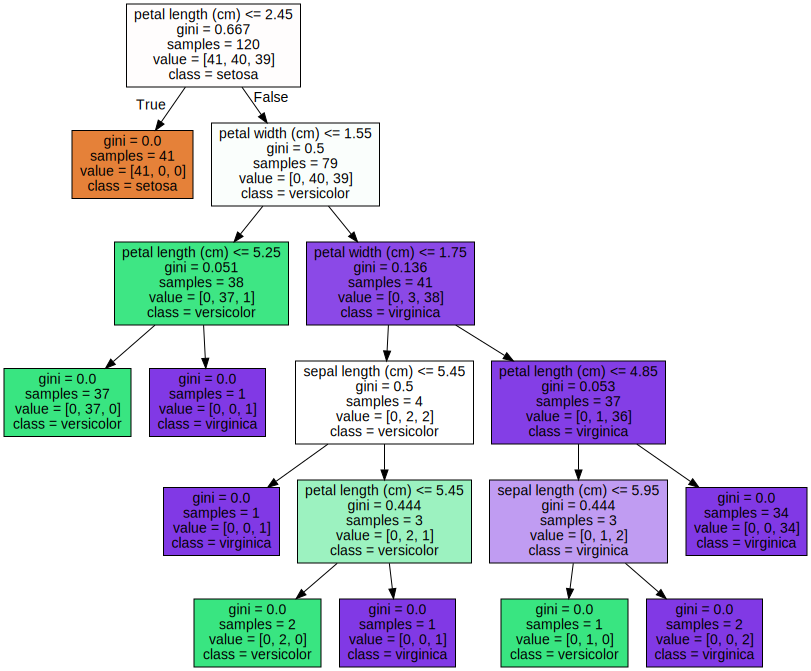

In [8]:
import graphviz
#위에서 생성된 tree.dot 파일을 Graphviz가 읽어서 주피터 노트북에서 시각화
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

Feature importances:
[0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


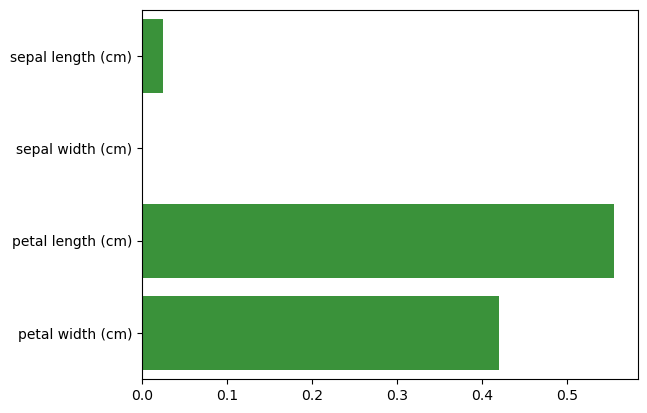

In [11]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#feature importance 추출
print("Feature importances:\n{0}".format(np.round(dt_clf.feature_importances_,3)))

#feature 별 importance 매핑
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))

#feature importance를 column 별로 시각화하기
sns.barplot(x=dt_clf.feature_importances_, y = iris_data.feature_names)
plt.show()

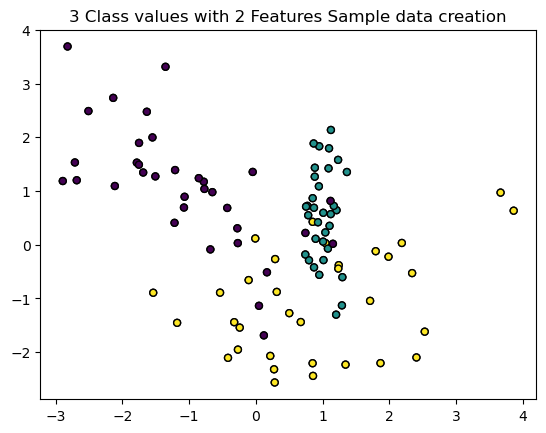

In [15]:
from sklearn.datasets import make_classification

plt.title("3 Class values with 2 Features Sample data creation")

#2차원 시각화를 위해서 피처는 2개, 클래스는 3가지 유형의 분류 샘플 데이터 생성
X_features, y_labels = make_classification(n_features = 2, n_redundant = 0, n_informative = 2,
                                           n_classes = 3, n_clusters_per_class = 1, random_state = 0)

#그래프 형태로 2개의 피처로 2차원 좌표 시각화, 각 클래스 값은 다른 색깔로 표시됨.
plt.scatter(X_features[:,0], X_features[:,1], marker = 'o', c = y_labels, s = 25, edgecolor = 'k')
plt.show()

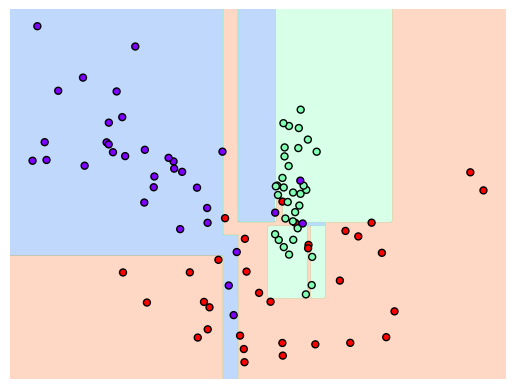

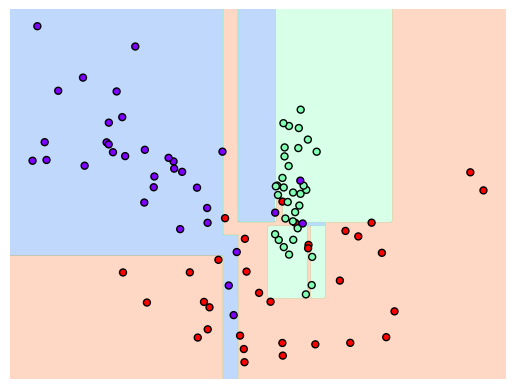

In [19]:
from sklearn.tree import DecisionTreeClassifier

import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)
    
#특정한 트리 생성 제약 없는 결정 트리의 학습과 결정 경계 시각화.
dt_clf = DecisionTreeClassifier(random_state = 156).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)
plt.show()

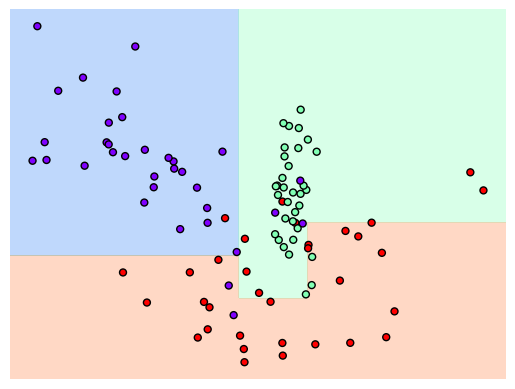

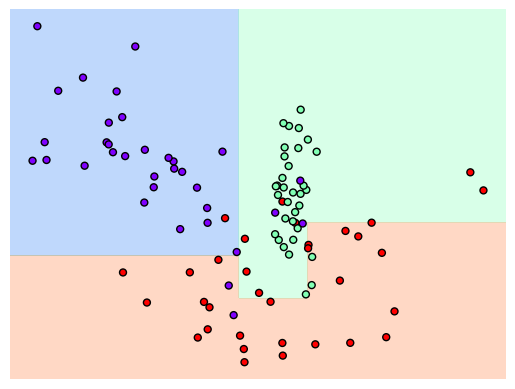

In [21]:
dt_clf = DecisionTreeClassifier(min_samples_leaf = 6, random_state = 156).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)
plt.show()

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#features.txt 파일에는 피처 이름 index와 피처명이 공백으로 분리되어 있음. 이를 dataframe으로 로드
feature_name_df = pd.read_csv(r'C:\Users\pinki\Documents\human_activity\features.txt', sep = '\s+',
                              header = None, names = ['column_index','column_name'])

#피처명 index를 제거하고, 피처명만 리스트 객체로 생성한 뒤 샘플로 10개만 추출
features_name = feature_name_df.iloc[:,1].values.tolist()
print('전체 피처명에서 10개만 추출', features_name[:10])

전체 피처명에서 10개만 추출 ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


In [2]:
feature_dup_df = feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index'] > 1].count())
feature_dup_df[feature_dup_df['column_index']>1].head()

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


In [3]:
print(feature_name_df)

     column_index                           column_name
0               1                     tBodyAcc-mean()-X
1               2                     tBodyAcc-mean()-Y
2               3                     tBodyAcc-mean()-Z
3               4                      tBodyAcc-std()-X
4               5                      tBodyAcc-std()-Y
..            ...                                   ...
556           557      angle(tBodyGyroMean,gravityMean)
557           558  angle(tBodyGyroJerkMean,gravityMean)
558           559                  angle(X,gravityMean)
559           560                  angle(Y,gravityMean)
560           561                  angle(Z,gravityMean)

[561 rows x 2 columns]


In [4]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data = old_feature_name_df.groupby('column_name').cumcount(),columns = ['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how = 'outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) if x[1] > 0 else x[0], axis =1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis = 1)
    return new_feature_name_df


In [5]:
def get_human_dataset():

    #각 데이터 파일은 공백으로 분리되어 있으므로 read_csv에서 공백문자를 sep으로 할당
    feature_name_df = pd.read_csv(r'C:\Users\pinki\Documents\human_activity\features.txt', sep = '\s+',
                              header = None, names = ['column_index','column_name'])

    #중복됭 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame 생성.
    new_feature_name_df = get_new_feature_name_df(feature_name_df)

    #DataFrame 에 피처명을 칼럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:,1].values.tolist()

    #학습 피처 데이터세트와 테스트 피처 데이터를 dataframe으로 로딩. 칼럼명을 feature_name 적용
    X_train = pd.read_csv(r'C:\Users\pinki\Documents\human_activity\train\X_train.txt',sep = '\s+', names = feature_name)
    X_test = pd.read_csv(r'C:\Users\pinki\Documents\human_activity\test\X_test.txt',sep = '\s+', names = feature_name)

    #학습 레이블과 테스트 레이블 데이터를 dataframe으로 로딩하고 칼럼명은 action으로 부여
    y_train = pd.read_csv(r'C:\Users\pinki\Documents\human_activity\train\y_train.txt',sep = '\s+', header = None, names = ['action'])
    y_test = pd.read_csv(r'C:\Users\pinki\Documents\human_activity\test\y_test.txt',sep = '\s+', header = None, names = ['action'])

    #로드된 학습/테스트용 dataframe을 모두 반환
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()

C:\Users\pinki\AppData\Local\Temp\ipykernel_19968\1308415898.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) if x[1] > 0 else x[0], axis =1)


In [6]:
print('##학습 피처 데이터셋##')
print(X_train.info())

##학습 피처 데이터셋##
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


In [7]:
print(y_train['action'].value_counts())

action
6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: count, dtype: int64


In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#예제 반복 시마다 동일한 예측 결과 도출을 위해 random_state 설정
dt_clf = DecisionTreeClassifier(random_state = 156)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('결정트리의 예측 정확도 : {0:.4f}'.format(accuracy))

#DeicisonTreeClassifier 기본 하이퍼 파라미터 추출
print('DecisionTreeClassifier 기본 하이퍼 파라미터:\n', dt_clf.get_params())

결정트리의 예측 정확도 : 0.8548
DecisionTreeClassifier 기본 하이퍼 파라미터:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 156, 'splitter': 'best'}


In [15]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [6,8,10,12,16,20,24],
    'min_samples_split' : [16]
}

grid_cv = GridSearchCV(dt_clf, param_grid = params, scoring = 'accuracy', cv = 5, verbose = 1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:',grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
GridSearchCV 최고 평균 정확도 수치: 0.8549
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


In [16]:
cv_results_df = pd.DataFrame(grid_cv.cv_results_)

In [17]:
cv_results_df[['param_max_depth','mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.847662
1,8,0.854879
2,10,0.852705
3,12,0.845768
4,16,0.847127
5,20,0.848624
6,24,0.848624


In [20]:
max_dep = [6,8,10,12,16,20,24]
#max_depth 값을 변화시키면서 그때마다 학습과 테스트 세트에서의 예측성능 측정
for dep in max_dep:
    dt_clf = DecisionTreeClassifier(max_depth = dep , min_samples_split = 16, random_state = 156)
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    print('max_dep = {0}, 정확도 {1:.4f}'.format(dep, accuracy))

max_dep = 6, 정확도 0.8551
max_dep = 8, 정확도 0.8717
max_dep = 10, 정확도 0.8599
max_dep = 12, 정확도 0.8571
max_dep = 16, 정확도 0.8599
max_dep = 20, 정확도 0.8565
max_dep = 24, 정확도 0.8565


In [10]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [8,12,16,20],
    'min_samples_split' : [16,24]
}

grid_cv = GridSearchCV(dt_clf, param_grid = params, scoring = 'accuracy', cv = 5, verbose = 1)
grid_cv.fit(X_train, y_train)

print('GridSearchCV 최고 평균 정확도 수치 : {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 파라미처 : ', grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
GridSearchCV 최고 평균 정확도 수치 : 0.8549
GridSearchCV 최적 파라미처 :  {'max_depth': 8, 'min_samples_split': 16}


In [13]:
best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred1)
print('결정 트리 예측 정확도 :{0:.4f}'.format(accuracy))

결정 트리 예측 정확도 :0.8717


<Figure size 800x600 with 0 Axes>

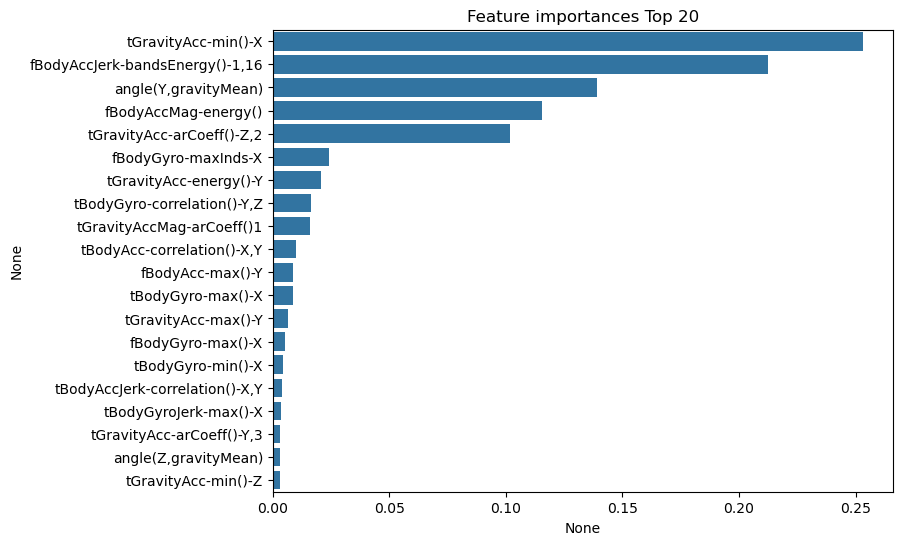

In [16]:
import seaborn as sns

ftr_importances_values = best_df_clf.feature_importances_
#Top 중요도로 정혛을 쉰게 하고, 시본의 막대그래프로 쉽게 표현하기 위해 series 변환
ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)
#중요도값 순으로 Series를 정렬
ftr_top20 = ftr_importances.sort_values(ascending = False)[:20]
plt.figure(figsize = (8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y = ftr_top20.index)
plt.show()